In [2]:
import pandas as pd
xlsx_data = pd.read_excel('ELECT Loan Data (1).xlsx')

In [4]:
pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.4 MB/s eta 0:00:00


In [5]:
import pdfplumber
pdf_data = []
with pdfplumber.open('ELECT_Loans_Database_Table.pdf') as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if table:
            pdf_data.extend(table)


In [6]:
columns = pdf_data[0]  # First row contains column headers
pdf_df = pd.DataFrame(pdf_data[1:], columns=columns)

# Clean column names and data (removing non-numeric entries or correcting data types)
pdf_df = pdf_df.apply(pd.to_numeric, errors='coerce').fillna(0)  # For simplicity, NaNs filled with 0


In [7]:
combined_df = pd.concat([xlsx_data, pdf_df], ignore_index=True)


In [8]:
combined_df.describe()


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1996.812403,1.186047,0.648062,0.731783,0.784496,0.130233,5365.589147,1608.560806,148.150388,334.837209,0.776744,1.959690
std,553.465890,0.389446,0.477945,1.002015,0.411491,0.336820,6021.940563,2867.004510,86.122299,63.206969,0.416752,0.789048
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1562.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.000000,333.000000,1.000000,1.000000
50%,1955.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3813.000000,1229.000000,128.000000,360.000000,1.000000,2.000000
75%,2448.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5726.000000,2306.000000,168.000000,360.000000,1.000000,3.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


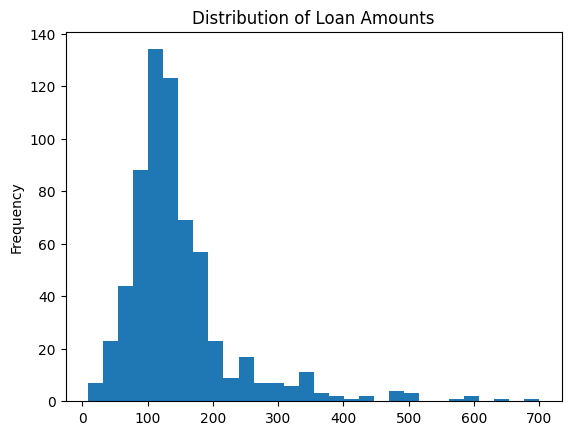

In [9]:
import matplotlib.pyplot as plt
combined_df['LoanAmount'].plot(kind='hist', bins=30, title='Distribution of Loan Amounts')
plt.show()


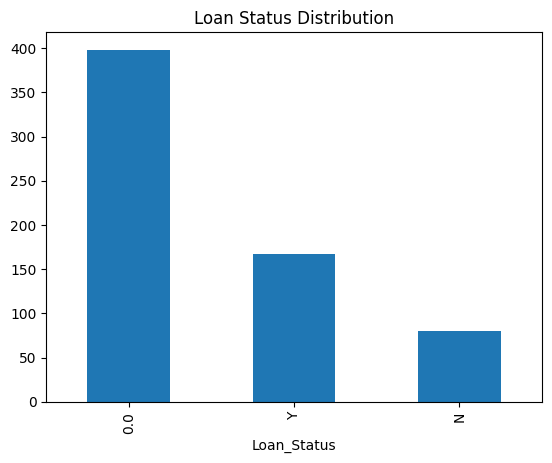

In [10]:
loan_status_count = combined_df['Loan_Status'].value_counts()
loan_status_count.plot(kind='bar', title='Loan Status Distribution')
plt.show()
